In [1]:
import pandas as pd

In [7]:
# read csv file
df_pop_raw = pd.read_csv('population_total.csv')

In [8]:
# first look at the raw data set
df_pop_raw

,country,year,population
0,China,2020.0,1.439324e+09
1,China,2019.0,1.433784e+09
2,China,2018.0,1.427648e+09
3,China,2017.0,1.421022e+09
4,China,2016.0,1.414049e+09
...,...,...,...
4180,United States,1965.0,1.997337e+08
4181,United States,1960.0,1.867206e+08
4182,United States,1955.0,1.716853e+08
4183,India,1960.0,4.505477e+08


In [9]:
# need to reshape dataframe for visualisation
# dropping null values

df_pop_raw.dropna(inplace=True)

In [16]:
# as aggregation isnt needed use .pivot()

df_pivot = df_pop_raw.pivot(index='year',
                 columns='country',
                 values='population')

In [18]:
# selecting countries

df_pivot = df_pivot[['United States','India','China',
          'Indonesia','Brazil']]

In [19]:
# showing re-shaped dataframe

df_pivot

country,United States,India,China,Indonesia,Brazil
year,,,,,
1955.0,171685336.0,4.098806e+08,6.122416e+08,77273425.0,62533919.0
1960.0,186720571.0,4.505477e+08,6.604081e+08,87751068.0,72179226.0
1965.0,199733676.0,4.991233e+08,7.242190e+08,100267062.0,83373530.0
1970.0,209513341.0,5.551898e+08,8.276014e+08,114793178.0,95113265.0
1975.0,219081251.0,6.231029e+08,9.262409e+08,130680727.0,107216205.0
1980.0,229476354.0,6.989528e+08,1.000089e+09,147447836.0,120694009.0
1985.0,240499825.0,7.843600e+08,1.075589e+09,164982451.0,135274080.0
1990.0,252120309.0,8.732778e+08,1.176884e+09,181413402.0,149003223.0
1995.0,265163745.0,9.639226e+08,1.240921e+09,196934260.0,162019896.0


# Line Plot

In [71]:
# importing matplotlib
# for exporting plots

import matplotlib.pyplot as plt

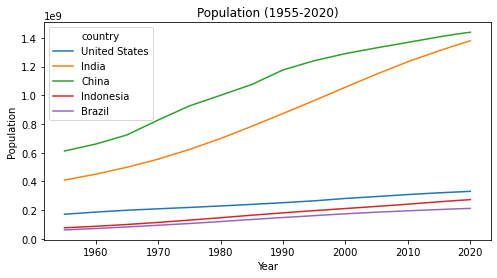

In [72]:
# using .plot
# kind argument for type of plot
# label and title arguments for text
# figsize(x,y) argument for image size

df_pivot.plot(kind='line',xlabel='Year',
              ylabel='Population',
              title='Population (1955-2020)',
              figsize=(8,4))

# save plot
plt.savefig('my_test.png')

# show plot
plt.show()

# Single Bar Plot

In [30]:
# selecting only one year (2020)
# isin attribute to drill down to year

df_pivot_2020 = df_pivot[df_pivot.index.isin([2020])]

In [31]:
# showing new dataframe

df_pivot_2020

country,United States,India,China,Indonesia,Brazil
year,,,,,
2020.0,331002651.0,1.380004e+09,1.439324e+09,273523615.0,212559417.0


In [40]:
# transpose dataframe from rows to colums or vice versa

df_pivot_2020 = df_pivot_2020.T

In [41]:
# showing transposed dataframe

df_pivot_2020

year,2020.0
country,
United States,3.310027e+08
India,1.380004e+09
China,1.439324e+09
Indonesia,2.735236e+08
Brazil,2.125594e+08


<AxesSubplot:xlabel='Country', ylabel='Population'>

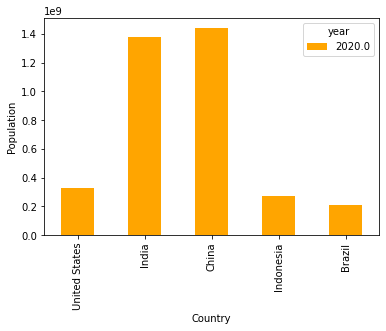

In [44]:
# making bar plot

df_pivot_2020.plot(kind='bar',color='orange',
                   xlabel='Country',
                   ylabel='Population')

# Bar Plot grouped by "n" variables

In [46]:
# selecting a few years 

df_pivot_sample = df_pivot[df_pivot.index.isin([1980, 1990,
                                                2000, 2010,
                                                2020])]

In [53]:
# transpose for graph readability

df_pivot_sample = df_pivot_sample.T

In [55]:
df_pivot_sample

year,1980.0,1990.0,2000.0,2010.0,2020.0
country,,,,,
United States,2.294764e+08,2.521203e+08,2.817109e+08,3.090115e+08,3.310027e+08
India,6.989528e+08,8.732778e+08,1.056576e+09,1.234281e+09,1.380004e+09
China,1.000089e+09,1.176884e+09,1.290551e+09,1.368811e+09,1.439324e+09
Indonesia,1.474478e+08,1.814134e+08,2.115138e+08,2.418342e+08,2.735236e+08
Brazil,1.206940e+08,1.490032e+08,1.747903e+08,1.957136e+08,2.125594e+08


<AxesSubplot:xlabel='Country', ylabel='Population'>

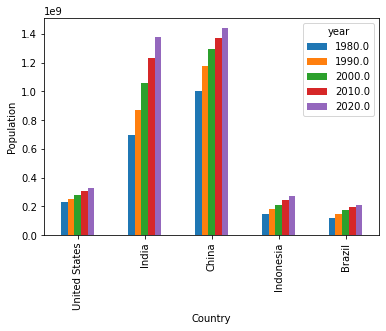

In [57]:
# making a grouped barplot

df_pivot_sample.plot(kind='bar',
                     xlabel='Country',
                     ylabel='Population')

# Pie Chart

In [60]:
# changing column name

df_pivot_2020.rename(columns={2020:'2020'},inplace=True)

In [63]:
df_pivot_2020

year,2020
country,
United States,3.310027e+08
India,1.380004e+09
China,1.439324e+09
Indonesia,2.735236e+08
Brazil,2.125594e+08


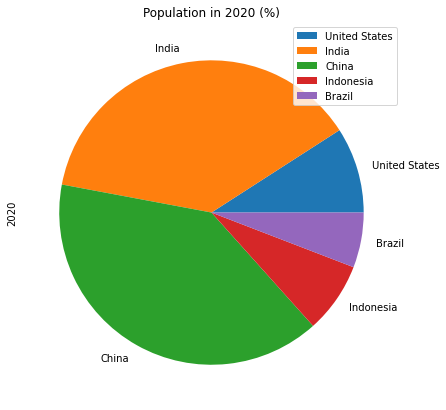

In [76]:
# making the plot
# y value should be the column with the data

df_pivot_2020.plot(kind='pie',y='2020',
                   title='Population in 2020 (%)',
                   figsize=(7,7))

# save plot
plt.savefig('my_pie.png')

# show plot
plt.show()

# Exporting pivot tables

In [74]:
#saves in directory where python script is

df_pivot.to_excel('pivot_table.xlsx')